In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Import iShares Core S&P 500 ETF data
df = pd.read_csv(Path('../Resources/IVV.csv'), parse_dates=True, index_col='date')
df.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,240.80,242.00,236.04,236.09,6418996
2018-12-26,237.73,247.89,235.46,247.67,13154113
2018-12-27,244.33,250.07,240.67,250.06,12693625
2018-12-28,251.03,252.88,247.95,249.33,10856339
2018-12-31,251.04,251.63,248.99,251.61,10117850


<AxesSubplot:xlabel='date'>

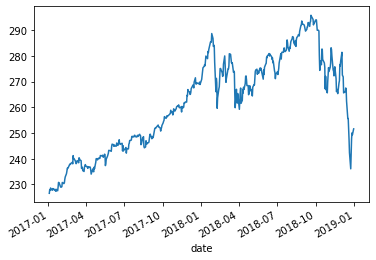

In [3]:
df.close.plot()

<AxesSubplot:xlabel='date'>

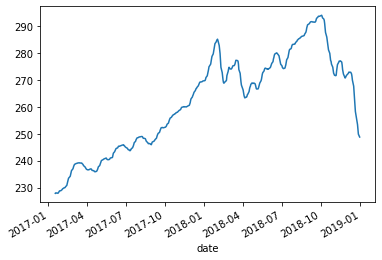

In [4]:
# Moving average. Each value is the average of previous 10 values.
df.close.rolling(window=10).mean().plot()

## ewm() info:
* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2.
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

In [5]:
df.close.ewm(span=10).mean().head()

date
2017-01-03    226.580000
2017-01-04    227.333500
2017-01-05    227.496910
2017-01-06    227.873507
2017-01-09    227.881113
Name: close, dtype: float64

In [6]:
df.close.ewm(com=4.5).mean().head()

date
2017-01-03    226.580000
2017-01-04    227.333500
2017-01-05    227.496910
2017-01-06    227.873507
2017-01-09    227.881113
Name: close, dtype: float64

In [7]:
# The shorter the halflife the more weight is givin to more recent prices
df.close.ewm(halflife=3.5).mean().head()

date
2017-01-03    226.580000
2017-01-04    227.332609
2017-01-05    227.496004
2017-01-06    227.871660
2017-01-09    227.879761
Name: close, dtype: float64

In [19]:
# Alpha must be: 0<a<1. 
# The higher the value of alpha, the more closely the EWMA tracks the original time series.
df.close.ewm(alpha=.185).mean().head()

date
2017-01-03    226.580000
2017-01-04    227.334821
2017-01-05    227.498251
2017-01-06    227.876242
2017-01-09    227.883105
Name: close, dtype: float64

In [ ]:
df.close.ewm(alpha=1).mean().head()

In [10]:
df.close.head()

date
2017-01-03    226.58
2017-01-04    227.95
2017-01-05    227.74
2017-01-06    228.64
2017-01-09    227.90
Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

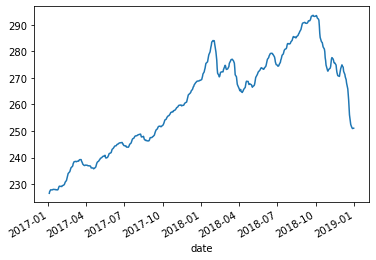

In [11]:
df.close.ewm(span=10).mean().plot()

<AxesSubplot:xlabel='date'>

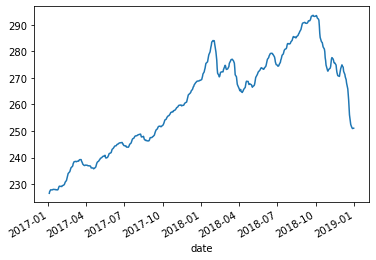

In [15]:
df.close.ewm(com=4.5).mean().plot()

<AxesSubplot:xlabel='date'>

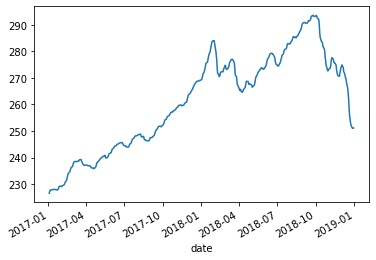

In [13]:
# Exponentially-Weighted Moving Average
df.close.ewm(halflife=3.5).mean().plot()

<AxesSubplot:xlabel='date'>

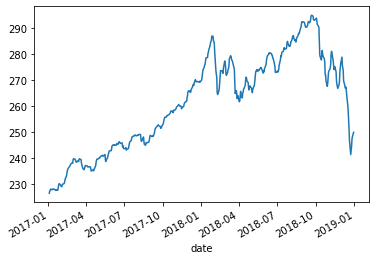

In [14]:
df.close.ewm(alpha=0.5).mean().plot()

In [16]:
#Hodrick-Prescott filter
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(df['close'])

<AxesSubplot:xlabel='date'>

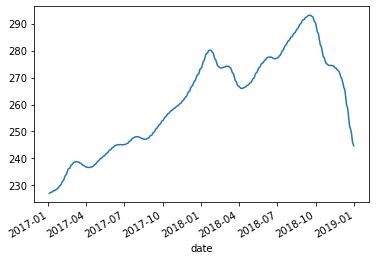

In [17]:
ts_trend.plot()

<AxesSubplot:xlabel='date'>

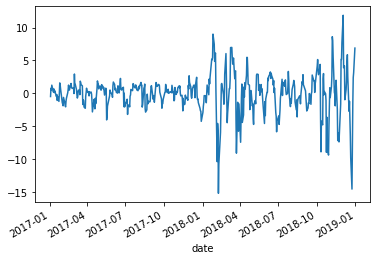

In [18]:
ts_noise.plot()